In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('final_311_comps_saleprice_data.csv')
df

ntacode       date  3-1-1 Call Center  Correspondence Unit  \
0        QN08   2010/1/1                  0                    0   
1        QN08   2010/2/1                  0                    0   
2        QN08   2010/3/1                  0                    0   
3        QN08   2010/4/1                  0                    0   
4        QN08   2010/5/1                  0                    0   
...       ...        ...                ...                  ...   
18715    QN53   2022/8/1                  0                    0   
18716    QN53   2022/9/1                  0                    0   
18717    QN53  2022/10/1                  0                    0   
18718    QN53  2022/11/1                  0                    0   
18719    QN53  2022/12/1                  0                    0   

       Department for the Aging  Department of Buildings  \
0                             2                       73   
1                             0                       54   
2                             0                       65   
3                             0                       58   
4                             0                       60   
...                         ...                      ...   
18715                         0                       51   
18716                         0                       46   
18717                         0                       54   
18718                         0                       34   
18719                         0                       27   

       Department of Consumer Affairs  Department of Education  \
0                                  17                        2   
1                                   4                        0   
2                                   2                        2   
3                                   9                        1   
4                                   7                        0   
...                               ...                      ...   
18715                               7                        0   
18716                              11                        0   
18717                               7                        1   
18718                              10                        0   
18719                               2                        0   

       Department of Environmental Protection  \
0                                         146   
1                                          93   
2                                         164   
3                                         154   
4                                         131   
...                                       ...   
18715                                     120   
18716                                      78   
18717                                      66   
18718                                      50   
18719                                      43   

       Department of Health and Mental Hygiene  ...  \
0                                           13  ...   
1                                           13  ...   
2                                           21  ...   
3                                           25  ...   
4                                           33  ...   
...                                        ...  ...   
18715                                       36  ...   
18716                                       22  ...   
18717                                       18  ...   
18718                                       11  ...   
18719                                       18  ...   

       Commercial Exemption Unit  DRIE Unit  Traffic Management Center  \
0                              0          0                          0   
1                              0          0                          0   
2                              0          0                          0   
3                              0          0                          0   
4                              0          0            

In [7]:
df.dtypes

ntacode                                                         object
date                                                            object
3-1-1 Call Center                                                int64
Correspondence Unit                                              int64
Department for the Aging                                         int64
Department of Buildings                                          int64
Department of Consumer Affairs                                   int64
Department of Education                                          int64
Department of Environmental Protection                           int64
Department of Health and Mental Hygiene                          int64
Department of Housing Preservation and Development               int64
Department of Information Technology and Telecommunications      int64
Department of Parks and Recreation                               int64
Department of Sanitation                                         int64
Depart

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [49]:
from sklearn.linear_model import LinearRegression

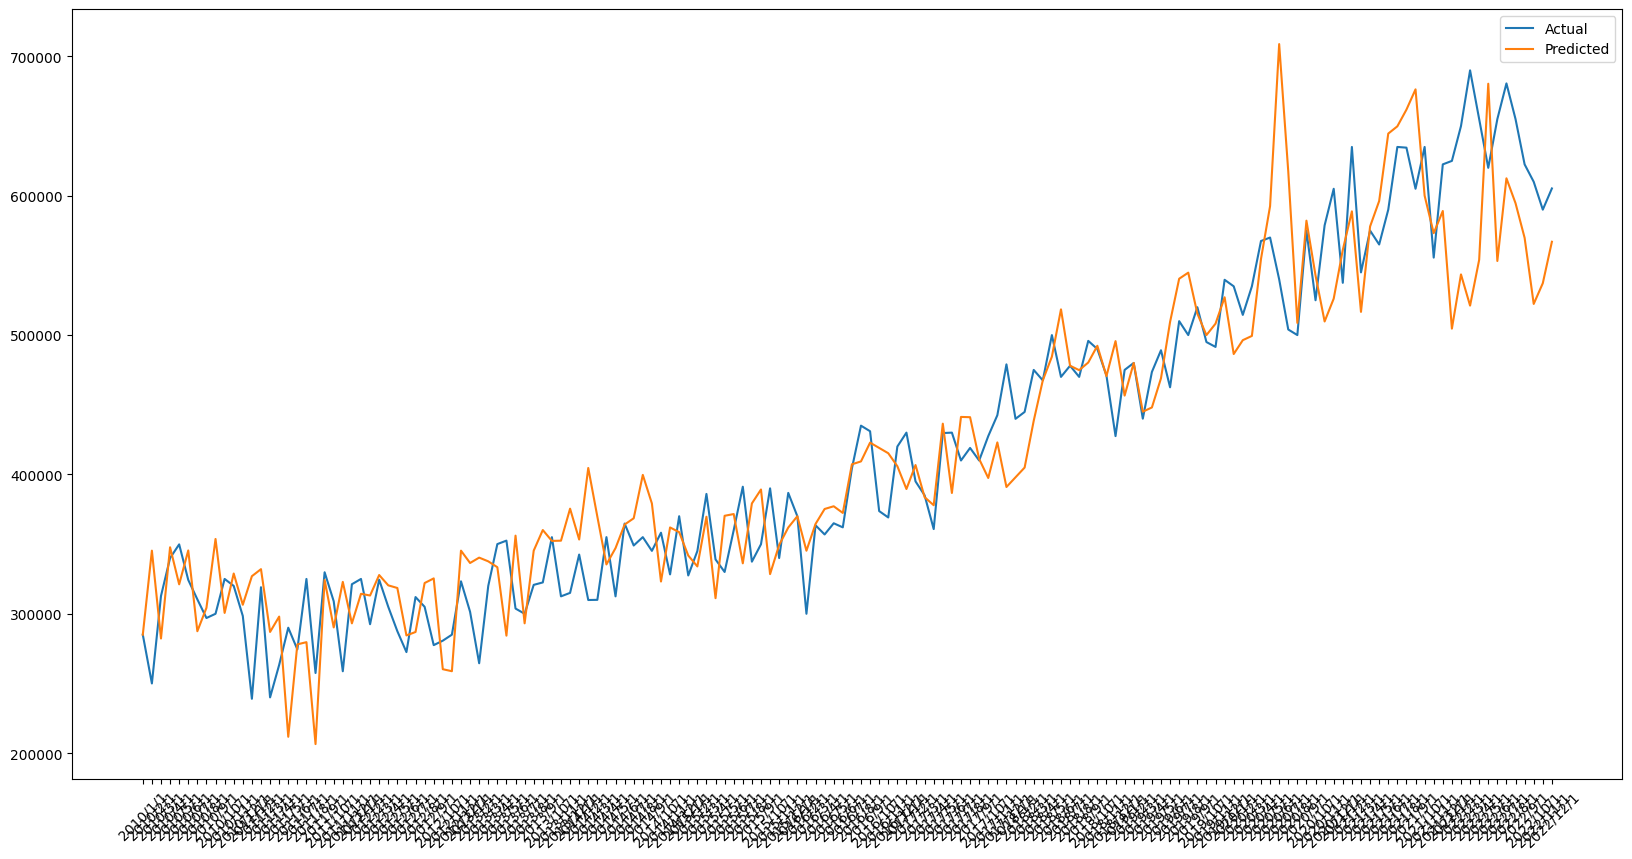

In [55]:
X_cols = ['3-1-1 Call Center', 'Correspondence Unit', 'Department for the Aging', 'Department of Buildings',
          'Department of Consumer Affairs', 'Department of Education', 'Department of Environmental Protection',
          'Department of Health and Mental Hygiene', 'Department of Housing Preservation and Development',
          'Department of Information Technology and Telecommunications', 'Department of Parks and Recreation',
          'Department of Sanitation', 'Department of Transportation', 'NYC Public Schools', 'New York City Police Department',
          'Refunds and Adjustments', 'Taxi and Limousine Commission',	'Economic Development Corporation', 
          'Division of Alternative Management', 'HRA Benefit Card Replacement', 'Child Care and Camps Complaint Unit',	
          'NYC Emergency Management', 'Mosquito Control', 'Office of the Taxpayer Advocate', 
          'Disability Rent Increase Exemption Unit', 'Commercial Exemption Unit', 'DRIE Unit',
          'Traffic Management Center', 'Department of Homeless Services', 'Discrepancy and Billing',
          'External Affairs Unit', 'Payment Operations', 'Mayor???s Office of Special Enforcement',
          'Office of Technology and Innovation']
Y_col = 'median_saleprice'

# Loop over each ntacode and fit a linear regression model
ntacodes = df['ntacode'].unique()
models = {}
for ntacode in ntacodes:
    # Select the subset of data for this ntacode
    ntacode_df = df[df['ntacode'] == ntacode]
    X = ntacode_df[X_cols]
    Y = ntacode_df[Y_col]
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, Y)
    models[ntacode] = model

# Use the models to make predictions for each ntacode
predictions = {}
for ntacode in ntacodes:
    # Select the subset of data for this ntacode
    ntacode_df = df[df['ntacode'] == ntacode]
    X = ntacode_df[X_cols]
    
    # Make predictions using the fitted model
    model = models[ntacode]
    Y_pred = model.predict(X)
    
    # Save the predictions
    predictions[ntacode] = Y_pred

# Plot the predictions for a single ntacode as an example
ntacode = ntacodes[0]
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df[df['ntacode'] == ntacode]['date'], df[df['ntacode'] == ntacode][Y_col], label='Actual')
plt.plot(df[df['ntacode'] == ntacode]['date'], predictions[ntacode], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

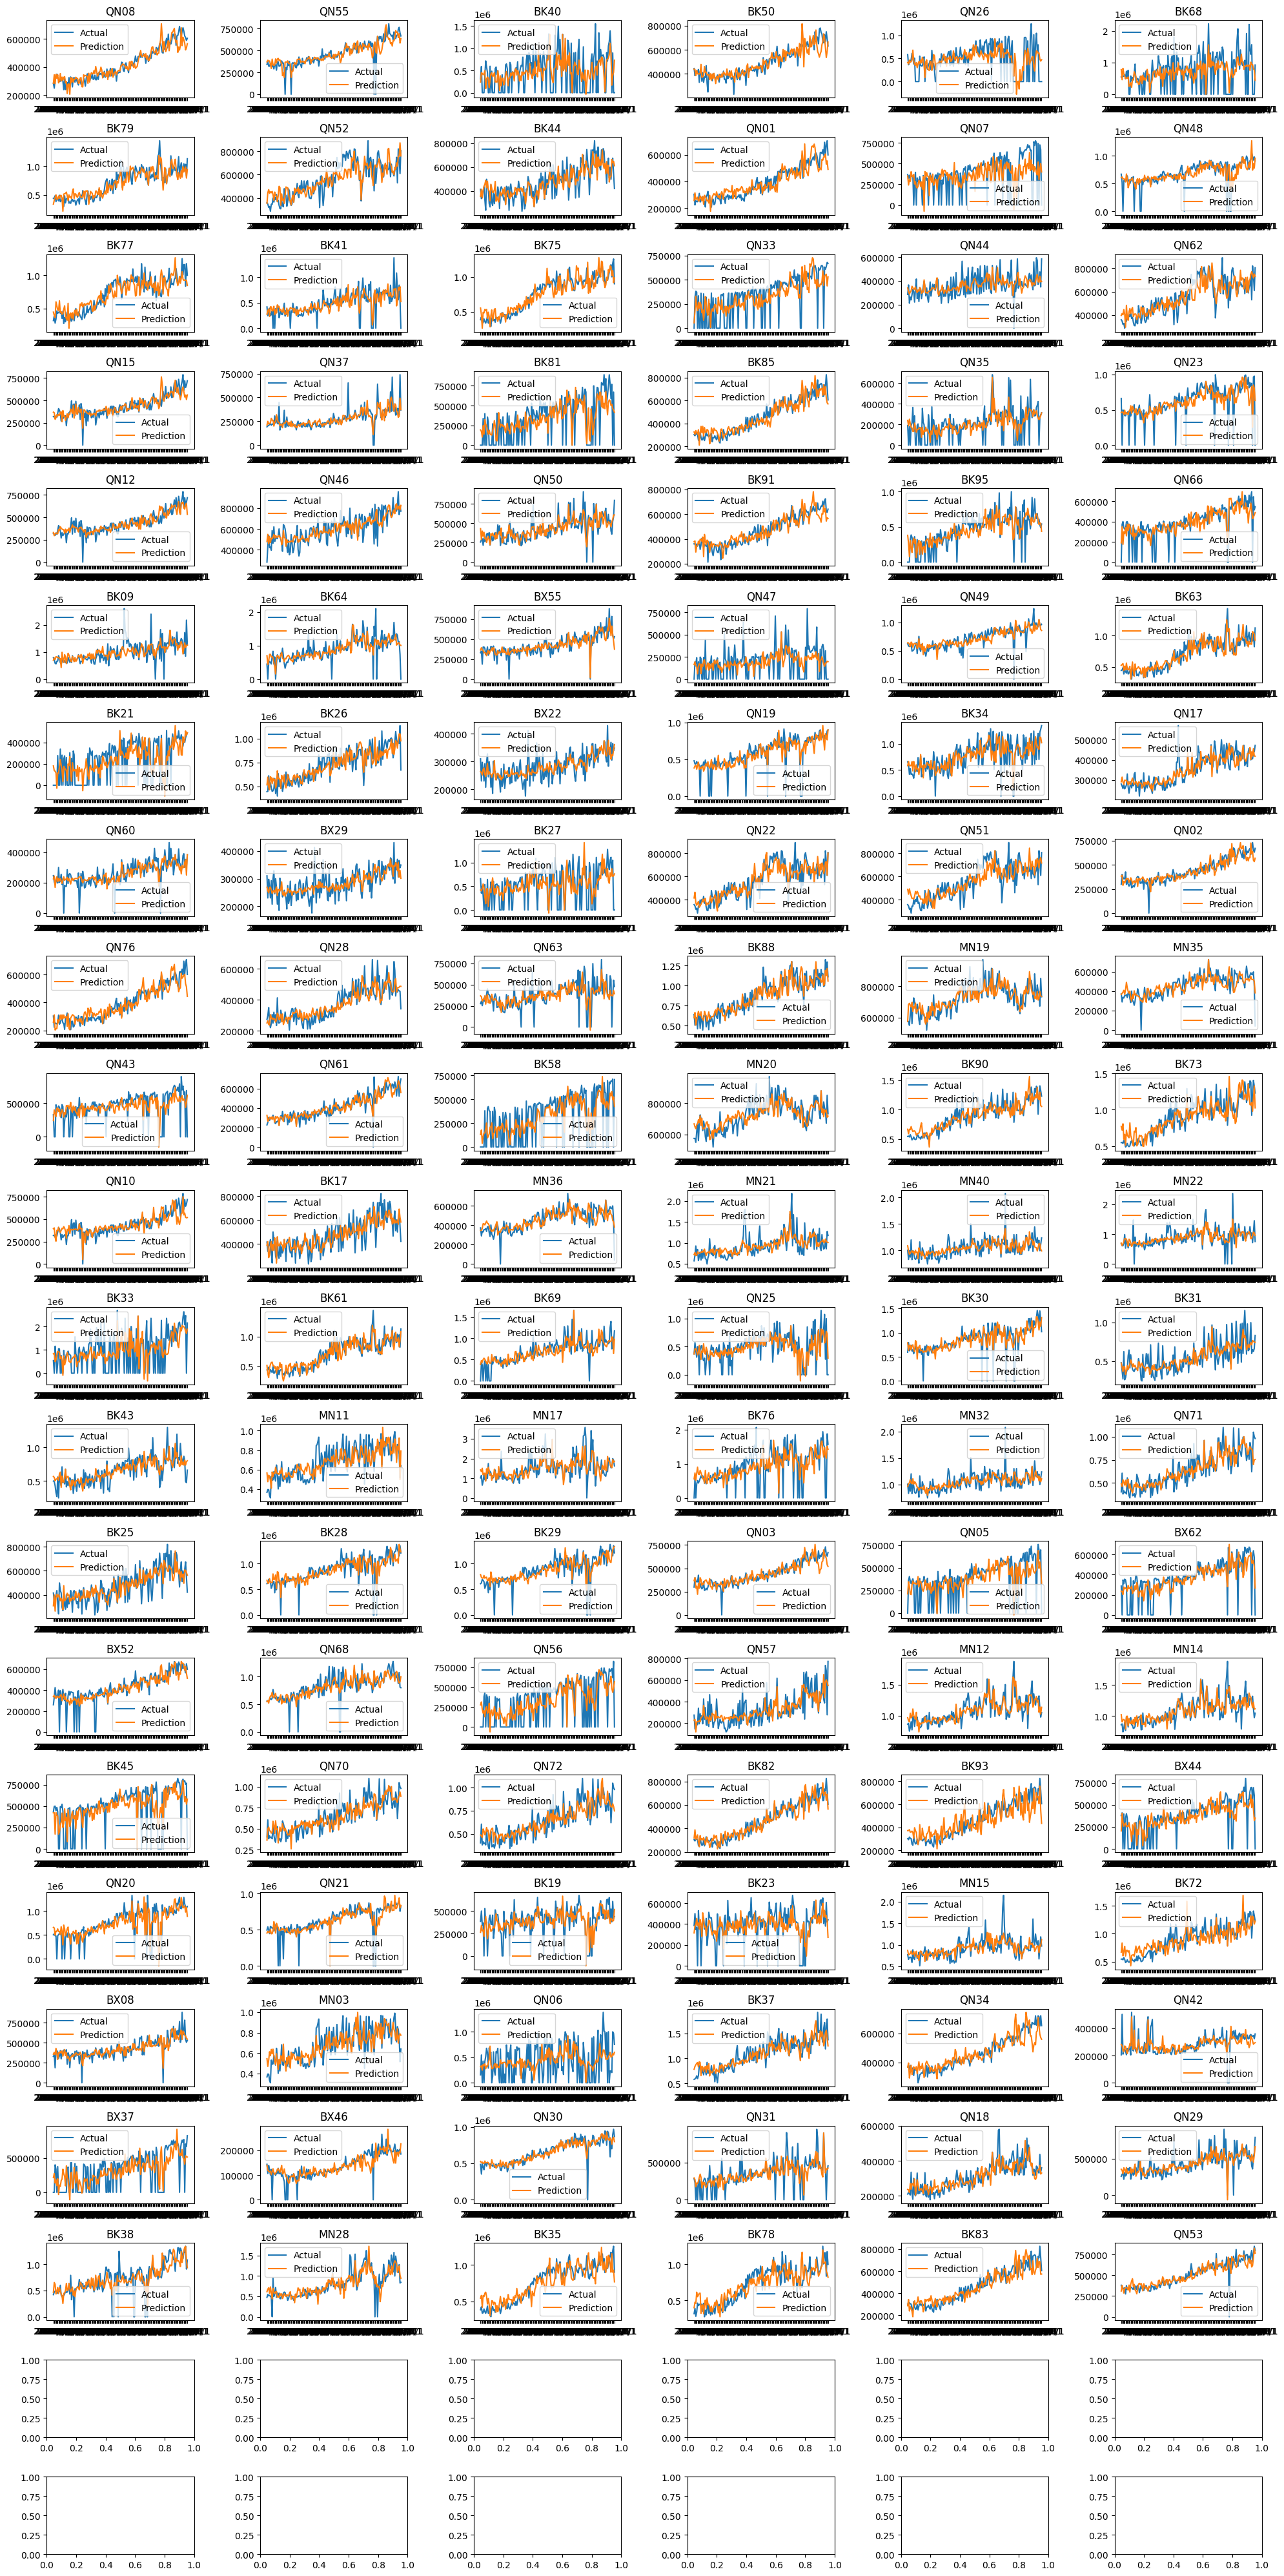

In [57]:
fig, axs = plt.subplots(22, 6, figsize=(20, 40))  # create a 22x6 grid of subplots

for i, ntacode in enumerate(df['ntacode'].unique()):
    row, col = i // 6, i % 6  # calculate the row and column index of the current subplot
    ax = axs[row, col]
    ntacode_df = df[df['ntacode'] == ntacode]  # filter the dataframe by the current ntacode
    ax.plot(ntacode_df['date'], ntacode_df['median_saleprice'], label='Actual')  # plot the median sale price
    ax.plot(ntacode_df['date'], predictions[ntacode], label='Prediction')
    ax.set_title(ntacode)  # set the title to the ntacode
    ax.legend()  # add a legend to the subplot

plt.tight_layout()  # adjust the layout of the subplots
plt.show()  # display the plot

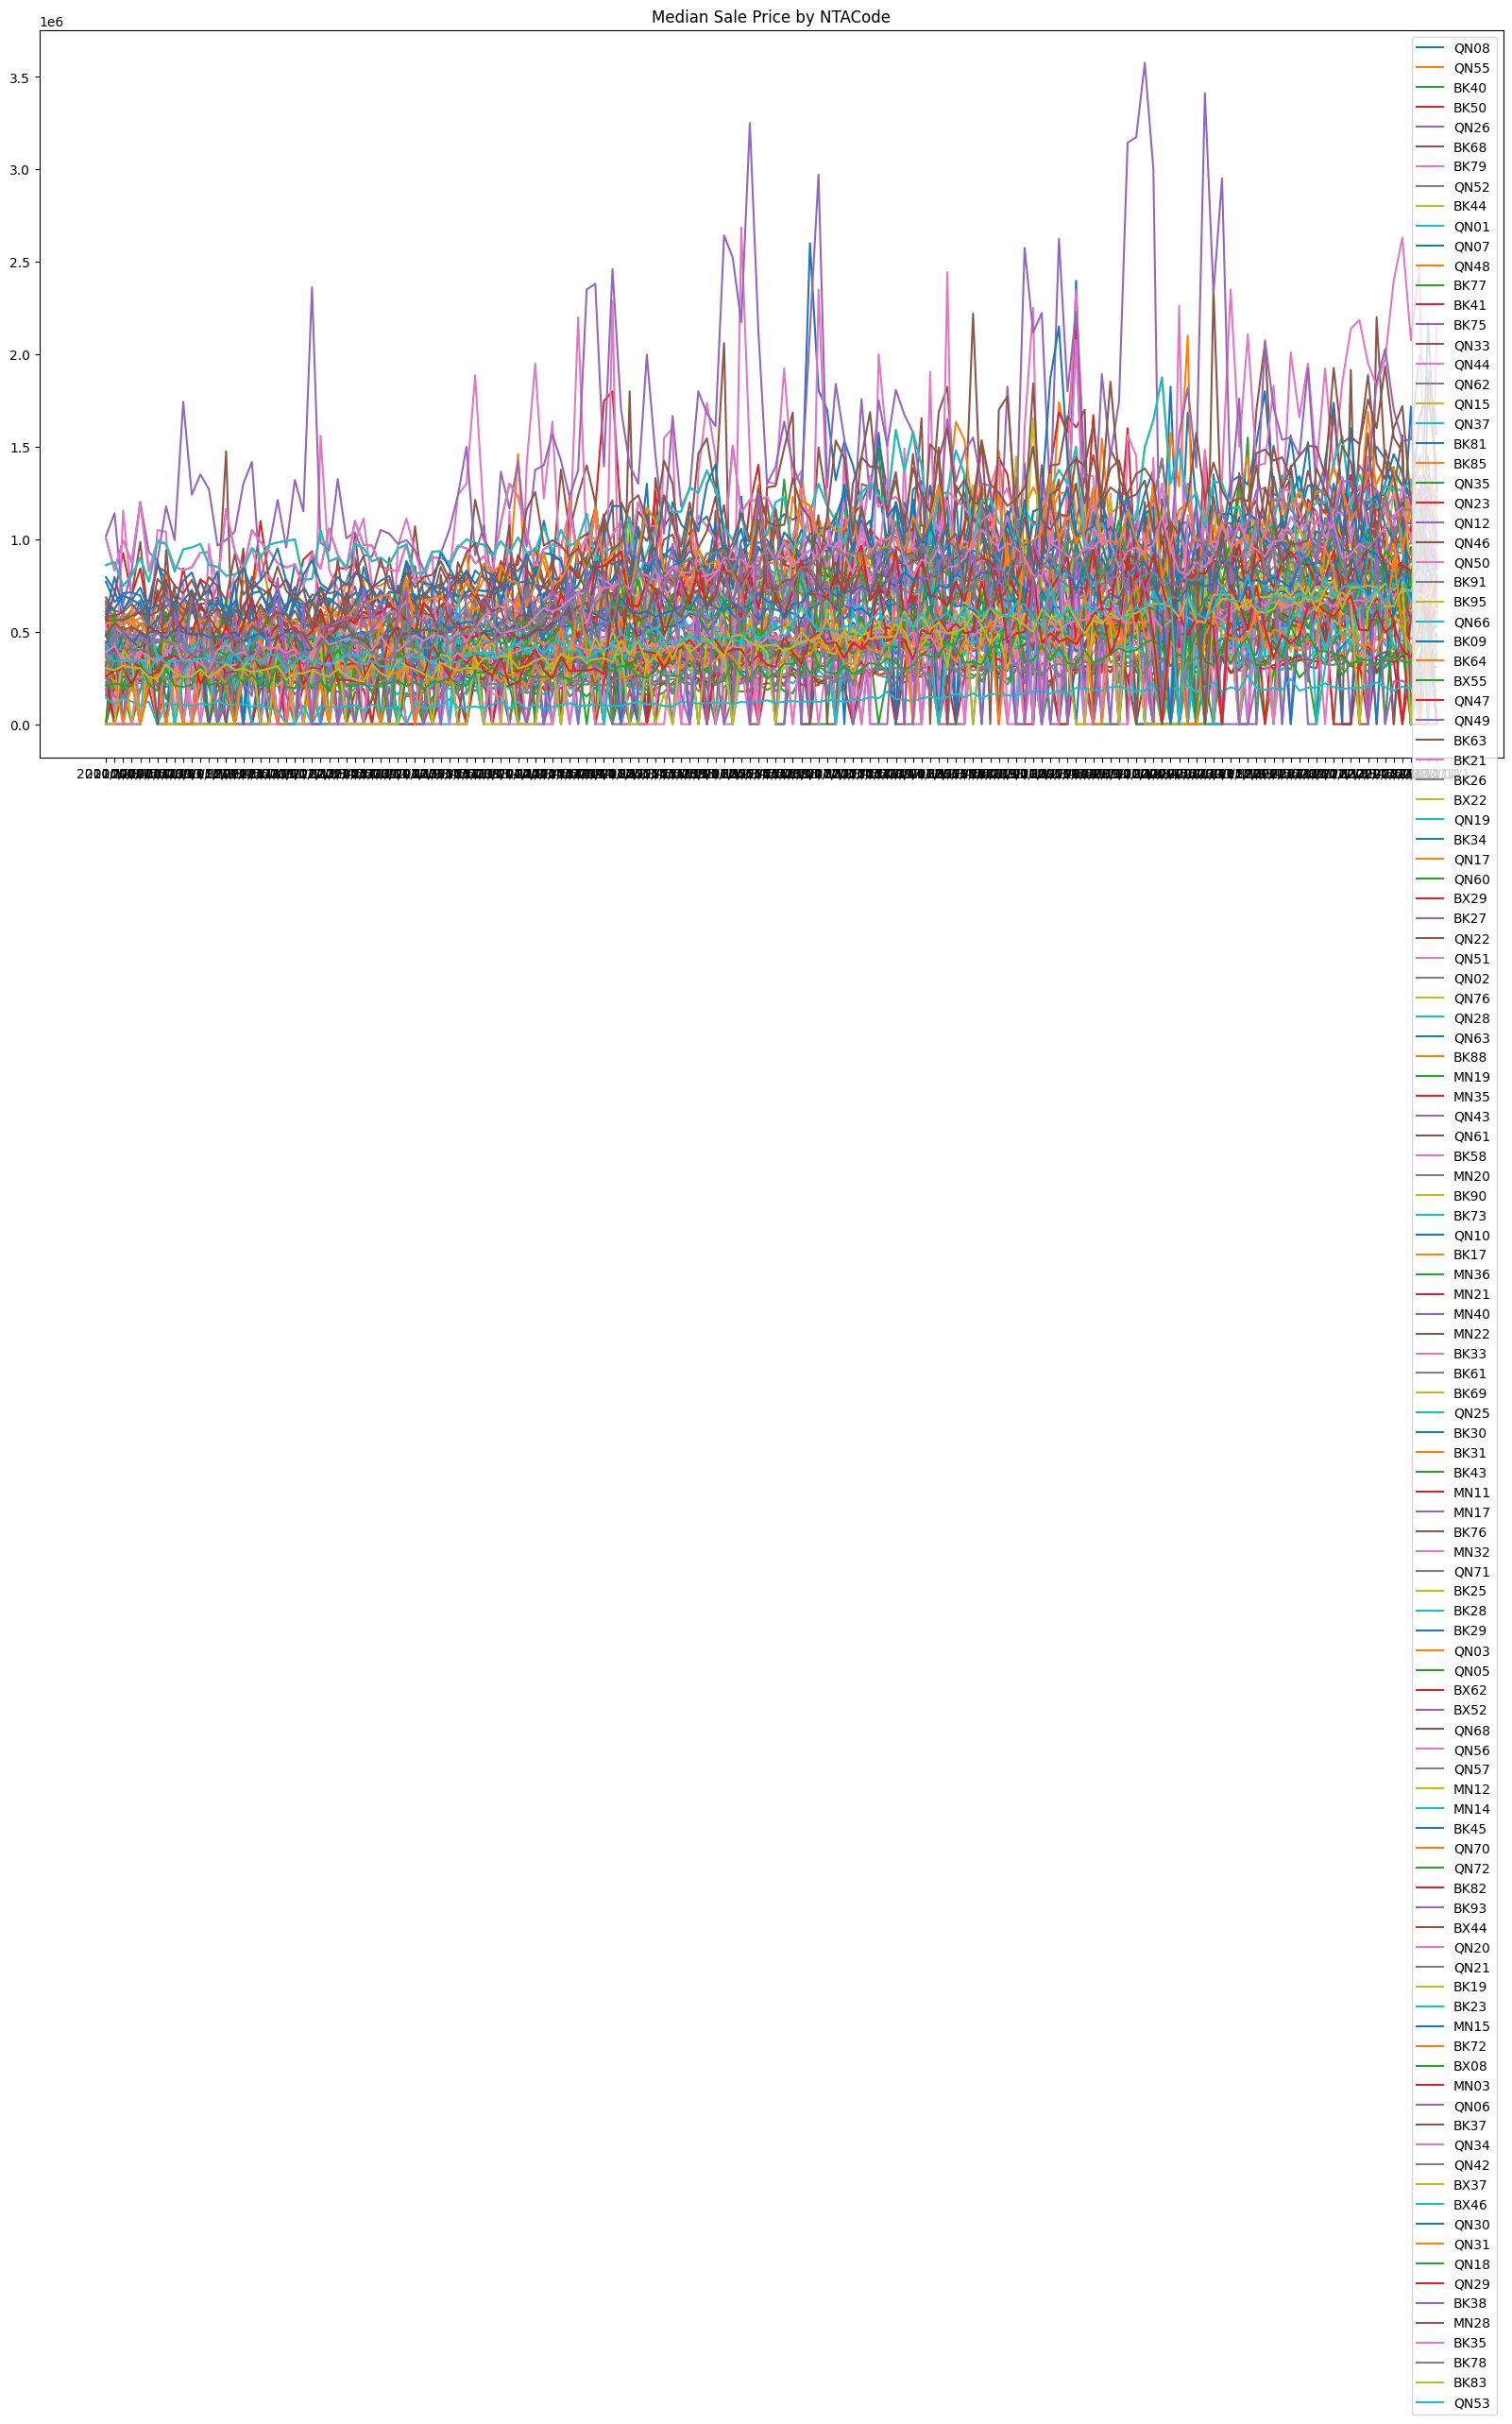

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))

for ntacode in df['ntacode'].unique():
    ntacode_df = df[df['ntacode'] == ntacode]  # filter the dataframe by the current ntacode
    ax.plot(ntacode_df['date'], ntacode_df['median_saleprice'], label=ntacode)  # plot the median sale price

ax.set_title('Median Sale Price by NTACode')  # set the title of the plot
ax.legend()  # add a legend to the plot
plt.show()  # display the plot

In [64]:
predictions_df = pd.DataFrame()

# loop through each NTACODE
for ntacode in df['ntacode'].unique():
    # filter the dataframe for the current NTACODE
    ntacode_df = df[df['ntacode'] == ntacode]
    
    # extract the x variables and y variable
    X = ntacode_df[['3-1-1 Call Center', 'Correspondence Unit', 'Department for the Aging', 'Department of Buildings',
          'Department of Consumer Affairs', 'Department of Education', 'Department of Environmental Protection',
          'Department of Health and Mental Hygiene', 'Department of Housing Preservation and Development',
          'Department of Information Technology and Telecommunications', 'Department of Parks and Recreation',
          'Department of Sanitation', 'Department of Transportation', 'NYC Public Schools', 'New York City Police Department',
          'Refunds and Adjustments', 'Taxi and Limousine Commission',	'Economic Development Corporation', 
          'Division of Alternative Management', 'HRA Benefit Card Replacement', 'Child Care and Camps Complaint Unit',	
          'NYC Emergency Management', 'Mosquito Control', 'Office of the Taxpayer Advocate', 
          'Disability Rent Increase Exemption Unit', 'Commercial Exemption Unit', 'DRIE Unit',
          'Traffic Management Center', 'Department of Homeless Services', 'Discrepancy and Billing',
          'External Affairs Unit', 'Payment Operations', 'Mayor???s Office of Special Enforcement',
          'Office of Technology and Innovation']]
    y = ntacode_df['median_saleprice']
    
    # fit the model and make predictions
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    
    # add the predictions to the dataframe
    ntacode_predictions = pd.DataFrame({'ntacode': ntacode, 'date': ntacode_df['date'], 'predicted_saleprice': predictions})
    predictions_df = pd.concat([predictions_df, ntacode_predictions])

In [65]:
predictions_df

ntacode       date  predicted_saleprice
0        QN08   2010/1/1        285000.000000
1        QN08   2010/2/1        345303.382607
2        QN08   2010/3/1        282256.115779
3        QN08   2010/4/1        347739.798575
4        QN08   2010/5/1        321134.342602
...       ...        ...                  ...
18715    QN53   2022/8/1        599936.013598
18716    QN53   2022/9/1        616943.059425
18717    QN53  2022/10/1        708809.094059
18718    QN53  2022/11/1        826678.078930
18719    QN53  2022/12/1        766433.682704

[18720 rows x 3 columns]

In [68]:
predictions_df1 = predictions_df.pivot(index='ntacode', columns='date', values='predicted_saleprice')

In [69]:
predictions_df1

date          2010/1/1      2010/10/1      2010/11/1      2010/12/1  \
ntacode                                                               
BK09     697798.551322  428324.203195  990863.745577  752210.790906   
BK17     389336.692272  449847.513319  409581.327280  239290.293005   
BK19     262508.288159  271471.248695  357485.392224  324971.026296   
BK21     180803.344813  185621.934929  137992.375330   33638.472539   
BK23     314944.671921  282520.963751  507523.265860  455726.430199   
...                ...            ...            ...            ...   
QN68     547945.512084  668170.944282  696939.241260  585039.090952   
QN70     363098.642111  443288.558458  594044.852574  493169.202135   
QN71     488027.985832  443306.324167  487120.129759  436296.537586   
QN72     487260.741682  538455.631528  422890.781375  483930.819041   
QN76     258437.572269  277165.565539  311641.115948  282974.706600   

date          2010/2/1       2010/3/1       2010/4/1       2010/5/1  \
ntacode                                                               
BK09     780888.990184  725325.215211  828905.269607  816189.519086   
BK17     417967.157730  284942.093911  305491.312927  395265.002622   
BK19     339428.749314  279222.970747  288543.297386  218176.110973   
BK21     136039.696197  131613.866827  114624.828250  -28505.261368   
BK23     384831.921831  393066.173240  454839.059328  385892.091185   
...                ...            ...            ...            ...   
QN68     566623.970696  520503.532445  605738.960265  649949.384766   
QN70     499004.176693  520050.043606  475419.644330  472137.682220   
QN71     460575.494243  534753.098445  505767.275833  476159.236922   
QN72     477900.374076  460873.715904  552995.345938  528441.165304   
QN76     311733.747458  203372.355816  212168.197486  213717.273203   

date          2010/6/1       2010/7/1  ...     2022/11/1     2022/12/1  \
ntacode                                ...                               
BK09     796520.710253  802886.642965  ...  1.228884e+06  1.255000e+06   
BK17     420692.785295  342819.155741  ...  6.221160e+05  5.822242e+05   
BK19     368197.036120  439841.037333  ...  3.951287e+05  5.178967e+05   
BK21     114089.360797  114601.376888  ...  4.671691e+05  4.919108e+05   
BK23     412394.365034  351962.848967  ...  4.364816e+05  2.725462e+05   
...                ...            ...  ...           ...           ...   
QN68     650870.974570  716918.985175  ...  9.069475e+05  9.989851e+05   
QN70     446653.696215  456074.203318  ...  9.374403e+05  8.856330e+05   
QN71     528367.153405  458072.147800  ...  7.491917e+05  7.530381e+05   
QN72     488565.803048  514600.793624  ...  7.962115e+05  7.481703e+05   
QN76     278122.243859  254461.699664  ...  5.123240e+05  4.433708e+05   

date         2022/2/1      2022/3/1      2022/4/1      2022/5/1      2022/6/1  \
ntacode                                                                         
BK09     1.238700e+06  1.165788e+06  1.347127e+06  1.381361e+06  1.267445e+06   
BK17     5.656279e+05  6.144135e+05  5.724939e+05  5.995400e+05  5.751300e+05   
BK19     5.041368e+05  5.091287e+05  4.152583e+05  5.073173e+05  4.195434e+05   
BK21     2.807572e+05  3.771568e+05  4.250000e+05  2.843346e+05  2.811766e+05   
BK23     4.035507e+05  4.795461e+05  4.123978e+05  5.325996e+05  5.979214e+05   
...               ...           ...           ...           ...           ...   
QN68     1.008079e+06  1.050962e+06  1.020949e+06  9.189244e+05  1.062127e+06   
QN70     8.387971e+05  8.441486e+05  8.676836e+05  8.468908e+05  8.630029e+05   
QN71     9.227654e+05  8.070604e+05  8.134910e+05  8.705374e+05  8.926540e+05   
QN72     8.225689e+05  8.211554e+05  9.622388e+05  8.596846e+05  8.621892e+05   
QN76     4.775639e+05  4.989309e+05  5.038674e+05  6.095000e+05  5.732195e+05   

date         2022/7/1      2022/8/1      2022/9/1  
ntacode                                            
BK09     9.268022e+05  1.135748

In [71]:
predictions_df1.to_csv('predictions.csv', index=True)

In [73]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# Create binary trend data
trend_data = predictions_df1.diff(axis=1).apply(lambda x: (x > 0).astype(int))

# Perform clustering using k-modes
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(trend_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 7001.0
Run 1, iteration: 2/100, moves: 4, cost: 6996.0
Run 1, iteration: 3/100, moves: 0, cost: 6996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 19, cost: 7045.0
Run 2, iteration: 2/100, moves: 10, cost: 6995.0
Run 2, iteration: 3/100, moves: 2, cost: 6991.0
Run 2, iteration: 4/100, moves: 0, cost: 6991.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 19, cost: 7021.0
Run 3, iteration: 2/100, moves: 10, cost: 7006.0
Run 3, iteration: 3/100, moves: 3, cost: 7005.0
Run 3, iteration: 4/100, moves: 1, cost: 7004.0
Run 3, iteration: 5/100, moves: 0, cost: 7004.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 7017.0
Run 4, iteration: 2/100, moves: 9, cost: 6995.0
Ru

In [84]:
clusters_df = pd.DataFrame({'ntacode': ntacodes, 'gentrification': clusters}).set_index('ntacode')

In [85]:
clusters_df

gentrification
ntacode                
QN08                  1
QN55                  1
BK40                  0
BK50                  0
QN26                  1
...                 ...
MN28                  0
BK35                  0
BK78                  0
BK83                  0
QN53                  1

[120 rows x 1 columns]

In [86]:
gentrification = predictions_df1.merge(clusters_df, left_index=True, right_index=True)

In [87]:
gentrification

2010/1/1      2010/10/1      2010/11/1      2010/12/1  \
ntacode                                                               
BK09     697798.551322  428324.203195  990863.745577  752210.790906   
BK17     389336.692272  449847.513319  409581.327280  239290.293005   
BK19     262508.288159  271471.248695  357485.392224  324971.026296   
BK21     180803.344813  185621.934929  137992.375330   33638.472539   
BK23     314944.671921  282520.963751  507523.265860  455726.430199   
...                ...            ...            ...            ...   
QN68     547945.512084  668170.944282  696939.241260  585039.090952   
QN70     363098.642111  443288.558458  594044.852574  493169.202135   
QN71     488027.985832  443306.324167  487120.129759  436296.537586   
QN72     487260.741682  538455.631528  422890.781375  483930.819041   
QN76     258437.572269  277165.565539  311641.115948  282974.706600   

              2010/2/1       2010/3/1       2010/4/1       2010/5/1  \
ntacode                                                               
BK09     780888.990184  725325.215211  828905.269607  816189.519086   
BK17     417967.157730  284942.093911  305491.312927  395265.002622   
BK19     339428.749314  279222.970747  288543.297386  218176.110973   
BK21     136039.696197  131613.866827  114624.828250  -28505.261368   
BK23     384831.921831  393066.173240  454839.059328  385892.091185   
...                ...            ...            ...            ...   
QN68     566623.970696  520503.532445  605738.960265  649949.384766   
QN70     499004.176693  520050.043606  475419.644330  472137.682220   
QN71     460575.494243  534753.098445  505767.275833  476159.236922   
QN72     477900.374076  460873.715904  552995.345938  528441.165304   
QN76     311733.747458  203372.355816  212168.197486  213717.273203   

              2010/6/1       2010/7/1  ...     2022/12/1      2022/2/1  \
ntacode                                ...                               
BK09     796520.710253  802886.642965  ...  1.255000e+06  1.238700e+06   
BK17     420692.785295  342819.155741  ...  5.822242e+05  5.656279e+05   
BK19     368197.036120  439841.037333  ...  5.178967e+05  5.041368e+05   
BK21     114089.360797  114601.376888  ...  4.919108e+05  2.807572e+05   
BK23     412394.365034  351962.848967  ...  2.725462e+05  4.035507e+05   
...                ...            ...  ...           ...           ...   
QN68     650870.974570  716918.985175  ...  9.989851e+05  1.008079e+06   
QN70     446653.696215  456074.203318  ...  8.856330e+05  8.387971e+05   
QN71     528367.153405  458072.147800  ...  7.530381e+05  9.227654e+05   
QN72     488565.803048  514600.793624  ...  7.481703e+05  8.225689e+05   
QN76     278122.243859  254461.699664  ...  4.433708e+05  4.775639e+05   

             2022/3/1      2022/4/1      2022/5/1      2022/6/1      2022/7/1  \
ntacode                                                                         
BK09     1.165788e+06  1.347127e+06  1.381361e+06  1.267445e+06  9.268022e+05   
BK17     6.144135e+05  5.724939e+05  5.995400e+05  5.751300e+05  5.783108e+05   
BK19     5.091287e+05  4.152583e+05  5.073173e+05  4.195434e+05  3.616919e+05   
BK21     3.771568e+05  4.250000e+05  2.843346e+05  2.811766e+05  4.533403e+05   
BK23     4.795461e+05  4.123978e+05  5.325996e+05  5.979214e+05  4.683692e+05   
...               ...           ...           ...           ...           ...   
QN68     1.050962e+06  1.020949e+06  9.189244e+05  1.062127e+06  1.096585e+06   
QN70     8.441486e+05  8.676836e+05  8.468908e+05  8.630029e+05  8.231178e+05   
QN71     8.070604e+05  8.134910e+05  8.705374e+05  8.926540e+05  8.679671e+05   
QN72     8.211554e+05  9.622388e+05  8.596846e+05  8.621892e+05  8.096350e+05   
QN76     4.989309e+05  5.038674e+05  6.095000e+05  5.732195e+05  5.823070e+05   

             2022/8/1      2022/9/1  gentrification  
ntacode                                              
BK09     1.135748e+06  1.341451e+06      

In [88]:
gentrification.to_csv('gentrification.csv', index=True)